## Feature Scalling

In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [12]:
if __name__ == '__main__':
    br = '\n'
    digits = load_digits()

    X = digits.data
    y = digits.target

    X_train, X_test, y_tain, y_test = train_test_split(X, y, random_state=0)
    sgd = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
    sgd.fit(X_train, y_tain)
    sgd_name = sgd.__class__.__name__

    print('<< ' + sgd_name + ' >>', br)

    y_pred = sgd.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Unscalled \'test\' accuracy:', accuracy)

    scaler = StandardScaler().fit(X_train)
    X_train_std, X_test_std = scaler.transform(X_train), scaler.transform(X_test)
    sgd_std = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
    sgd_std.fit(X_train_std, y_tain)

    y_pred = sgd_std.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print('scaled \'test\' accuracy:', np.round(accuracy, 4))



<< SGDClassifier >> 

Unscalled 'test' accuracy: 0.9466666666666667
scaled 'test' accuracy: 0.9533


## Dimensionality Reduction

#### PCA and LDA Iris dimensionality rreduction

       PCA1      PCA2
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949 

       LDA1      LDA2
0 -8.061800  0.300421
1 -7.128688 -0.786660
2 -7.489828 -0.265384


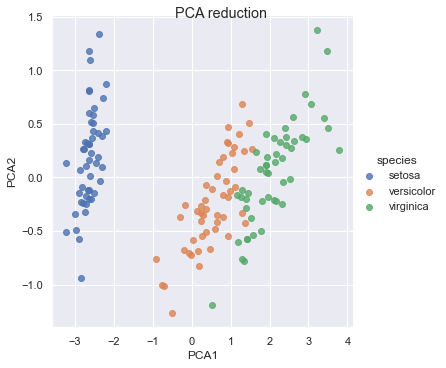

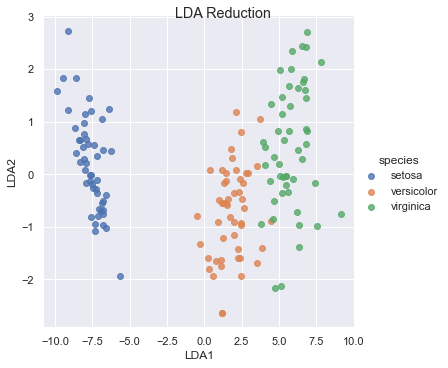

In [17]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns, matplotlib.pyplot as plt

if __name__ == '__main__':
    br = '\n'
    iris = load_iris()
    X = iris.data
    y = iris.target
    pca = PCA(n_components=0.95)
    X_reduced = pca.fit_transform(X)
    components = pca.n_components_
    model = PCA(n_components=components)
    model.fit(X)
    X_2D = model.transform(X)
    iris_df = sns.load_dataset('iris')
    iris_df['PCA1'] = X_2D[:, 0]
    iris_df['PCA2'] = X_2D[:, 1]
    
    print(iris_df[['PCA1', 'PCA2']].head(3), br)
    sns.set(color_codes=True)
    sns.lmplot('PCA1', 'PCA2', hue='species', data=iris_df, fit_reg=False)
    plt.suptitle('PCA reduction')

    lda = LinearDiscriminantAnalysis(n_components=2)
    transform_lda = lda.fit_transform(X, y)
    iris_df['LDA1'] = transform_lda[:, 0]
    iris_df['LDA2'] = transform_lda[:, 1]

    print(iris_df[['LDA1', 'LDA2']].head(3))
    sns.lmplot('LDA1', 'LDA2', hue='species', data=iris_df, fit_reg=False)
    plt.suptitle('LDA Reduction')
    plt.show()


#### Isomap Visualization

In [20]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt


feature data shape:  (1797, 64)
project data to 2D: (1797, 2)


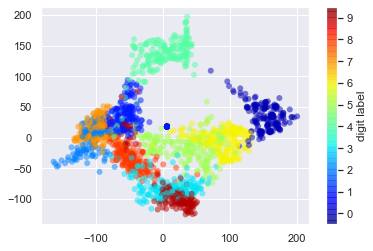

In [23]:
if __name__ == '__main__':
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target

    print('feature data shape: ', X.shape)


    iso = Isomap(n_components=2)
    iso_name = iso.__class__.__name__
    iso.fit(digits.data)
    data_projected = iso.transform(X)

    print('project data to 2D:', data_projected.shape)

    project_1, project_2 = data_projected[:, 0], data_projected[:, 1]

    plt.figure(iso_name)
    plt.scatter(project_1, project_2, c=y, edgecolors='none', alpha=0.5, cmap='jet')
    plt.colorbar(label='digit label', ticks=range(10))
    plt.clim(-0.5, 9.5)
    plt.show()



## Classification From Simple Training sets

### Classify wine data

In [24]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from random import *




In [25]:
if __name__ == '__main__':
    br = '\n'
    data = load_wine()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    lda = LDA.fit(X_train, y_train)
    print(lda, br)
    lda_name = lda.__class__.__name__
    y_pred = lda.predict(X_train)

    accuracy = metrics.accuracy_score(y_train, y_pred)
    accuracy = str(accuracy * 100) + '%'

    print(lda_name + ':')
    print('train: ', accuracy)

    y_pred_test = lda.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_test)
    accuracy = str(round(accuracy * 100, 2)) + '%'

    print('test ', accuracy, br)
    print('Confusion Matrix', lda_name)
    print(metrics.confusion_matrix(y_test, lda.predict(X_test)), br)
    std_scale = StandardScaler().fit(X_train)

    X_train = std_scale.transform(X_train)
    X_test = std_scale.transform(X_test)

    sgd = SGDClassifier(max_iter=5, random_state=0)
    print(sgd, br)
    sgd.fit(X_train, y_tain)
    sgd_name = sgd.__class__.__name__
    y_pred = sgd.predict(X_train)
    y_pred_test = sgd.predict(X_test)

    print(sgd_name + ':')
    print('train: {:.2f%}'.format(metrics.accuracy_score(y_train, y_pred)))
    print('test: {:.2f%}'.format(metrics.accuracy_score(y_test, y_pred_test)))

    print('Confusion Matrix ', sgd_name)
    print(metrics.confusion_matrix(y_test, sgd.predict(X_test)), br)

    n, ls = 100, []

    for i, row in enumerate(range(n)):
        rs = randint(0, 100)
        sgd = SGDClassifier(max_iter=5, random_state=0)
        sgd.fit(X_train, y_train)
        y_pred = sgd.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        ls.append(accuracy)
    avg = sum(ls) / len(ls)
    print('MCS (true test accuracy): ', avg)

TypeError: fit() missing 1 required positional argument: 'y'

In [2]:
%history -g -f Feature Scalling.ipynb

In [3]:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

if __name__ == '__main__':
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    gnb = GuassianNB().fit(X_train, y_train)
    gnb_name = gnb.__class__.__name__
    y_pred = gnb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(gnb_name + '\'test\' accuracy: ', accuracy)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)

    sgd = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
    sgd_name = sgd.__class__.__name__
    sgd.fit(X_test_std, y_tain)
    y_pred = sgd.predict(X_test_std)

    accuracy = accuracy_score(y_test, y_pred)
    print(sgd_name + '\'test\' accuracy: ', accuracy)

    svm = SVC(gamma='auto').fit(X_train_std, y_tain)
    svm_name = svm.__class__.__name__
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print (svm_name + ' \'test\' accuracy:', accuracy, br)
    indx = find_misses(y_test, y_pred)

    print ('total misclassifications (' + str(svm_name) + '\'):', len(indx), br)
    print ('pred', 'actual')    
    misses = [(y_pred[row], y_test[row], i)for i, row in enumerate(indx)]    
    [print (row[0], '  ', row[1]) for row in misses]    
    img_indx = misses[0][2]    
    img_pred = misses[0][0]    
    img_act = misses[0][1]    
    text = str(img_pred)    
    print(classification_report(y_test, y_pred))    
    cm = confusion_matrix(y_test, y_pred)    
    plt.figure(1)    
    ax = plt.axes()    
    sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)    
    title = svm_name + ' confusion matrix'    
    ax.set_title(title)    
    plt.xlabel('true value')    
    plt.ylabel('predicted value')    
    test_images = X_test.reshape(-1, 8, 8)    
    plt.figure(2)
    plt.title('1st misclassifcation')
    plt.imshow(test_images[img_indx], cmap='gray', interpolation='gaussian')
    plt.text(0, 0.05, text, color='r', bbox=dict(facecolor='white'))
    plt.show()
404/39:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
404/40:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

if __name__ == '__main__':
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    gnb = GuassianNB().fit(X_train, y_train)
    gnb_name = gnb.__class__.__name__
    y_pred = gnb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(gnb_name + '\'test\' accuracy: ', accuracy)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)

    sgd = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
    sgd_name = sgd.__class__.__name__
    sgd.fit(X_test_std, y_tain)
    y_pred = sgd.predict(X_test_std)

    accuracy = accuracy_score(y_test, y_pred)
    print(sgd_name + '\'test\' accuracy: ', accuracy)

    svm = SVC(gamma='auto').fit(X_train_std, y_tain)
    svm_name = svm.__class__.__name__
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print (svm_name + ' \'test\' accuracy:', accuracy, br)
    indx = find_misses(y_test, y_pred)

    print ('total misclassifications (' + str(svm_name) + '\'):', len(indx), br)
    print ('pred', 'actual')    
    misses = [(y_pred[row], y_test[row], i)for i, row in enumerate(indx)]    
    [print (row[0], '  ', row[1]) for row in misses]    
    img_indx = misses[0][2]    
    img_pred = misses[0][0]    
    img_act = misses[0][1]    
    text = str(img_pred)    
    print(classification_report(y_test, y_pred))    
    cm = confusion_matrix(y_test, y_pred)    
    plt.figure(1)    
    ax = plt.axes()    
    sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)    
    title = svm_name + ' confusion matrix'    
    ax.set_title(title)    
    plt.xlabel('true value')    
    plt.ylabel('predicted value')    
    test_images = X_test.reshape(-1, 8, 8)    
    plt.figure(2)
    plt.title('1st misclassifcation')
    plt.imshow(test_images[img_indx], cmap='gray', interpolation='gaussian')
    plt.text(0, 0.05, text, color='r', bbox=dict(facecolor='white'))
    plt.show()
404/41:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

if __name__ == '__main__':
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    gnb = GaussianNB().fit(X_train, y_train)
    gnb_name = gnb.__class__.__name__
    y_pred = gnb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(gnb_name + '\'test\' accuracy: ', accuracy)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)

    sgd = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
    sgd_name = sgd.__class__.__name__
    sgd.fit(X_test_std, y_tain)
    y_pred = sgd.predict(X_test_std)

    accuracy = accuracy_score(y_test, y_pred)
    print(sgd_name + '\'test\' accuracy: ', accuracy)

    svm = SVC(gamma='auto').fit(X_train_std, y_tain)
    svm_name = svm.__class__.__name__
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print (svm_name + ' \'test\' accuracy:', accuracy, br)
    indx = find_misses(y_test, y_pred)

    print ('total misclassifications (' + str(svm_name) + '\'):', len(indx), br)
    print ('pred', 'actual')    
    misses = [(y_pred[row], y_test[row], i)for i, row in enumerate(indx)]    
    [print (row[0], '  ', row[1]) for row in misses]    
    img_indx = misses[0][2]    
    img_pred = misses[0][0]    
    img_act = misses[0][1]    
    text = str(img_pred)    
    print(classification_report(y_test, y_pred))    
    cm = confusion_matrix(y_test, y_pred)    
    plt.figure(1)    
    ax = plt.axes()    
    sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)    
    title = svm_name + ' confusion matrix'    
    ax.set_title(title)    
    plt.xlabel('true value')    
    plt.ylabel('predicted value')    
    test_images = X_test.reshape(-1, 8, 8)    
    plt.figure(2)
    plt.title('1st misclassifcation')
    plt.imshow(test_images[img_indx], cmap='gray', interpolation='gaussian')
    plt.text(0, 0.05, text, color='r', bbox=dict(facecolor='white'))
    plt.show()
404/42:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

if __name__ == '__main__':
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    gnb = GaussianNB().fit(X_train, y_train)
    gnb_name = gnb.__class__.__name__
    y_pred = gnb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(gnb_name + '\'test\' accuracy: ', accuracy)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)

    sgd = SGDClassifier(random_state=0, max_iter=1000, tol=0.001)
    sgd_name = sgd.__class__.__name__
    sgd.fit(X_train_std, y_train)
    y_pred = sgd.predict(X_test_std)

    accuracy = accuracy_score(y_test, y_pred)
    print(sgd_name + '\'test\' accuracy: ', accuracy)

    svm = SVC(gamma='auto').fit(X_train_std, y_tain)
    svm_name = svm.__class__.__name__
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print (svm_name + ' \'test\' accuracy:', accuracy, br)
    indx = find_misses(y_test, y_pred)

    print ('total misclassifications (' + str(svm_name) + '\'):', len(indx), br)
    print ('pred', 'actual')    
    misses = [(y_pred[row], y_test[row], i)for i, row in enumerate(indx)]    
    [print (row[0], '  ', row[1]) for row in misses]    
    img_indx = misses[0][2]    
    img_pred = misses[0][0]    
    img_act = misses[0][1]    
    text = str(img_pred)    
    print(classification_report(y_test, y_pred))    
    cm = confusion_matrix(y_test, y_pred)    
    plt.figure(1)    
    ax = plt.axes()    
    sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)    
    title = svm_name + ' confusion matrix'    
    ax.set_title(title)    
    plt.xlabel('true value')    
    plt.ylabel('predicted value')    
    test_images = X_test.reshape(-1, 8, 8)    
    plt.figure(2)
    plt.title('1st misclassifcation')
    plt.imshow(test_images[img_indx], cmap='gray', interpolation='gaussian')
    plt.text(0, 0.05, text, color='r', bbox=dict(facecolor='white'))
    plt.show()

SyntaxError: invalid syntax (<ipython-input-3-576e9603668e>, line 60)

### Clarifying load_digits with various algorithms

In [4]:
import humanfriendly as hf
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
def get_scores(model, Xtest, ytest, avg):
    y_pred = model.predict(Xtest)
    accuracy = accuracy_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred, average=avg)
    return (accuracy, f1)

def get_time(time):
    return hf.format_timespan(time, detailed=True)

if __name__ == '__main__':
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)

    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', max_iter=4000)
    lr.fit(X_train_std, y_train)
    lr_name = lr.__class__.__name__
    acc, f1 = get_scores(lr, X_test_std, y_test, 'micro')
    print (lr_name + ' scaled \'test\':')
    print ('accuracy:', acc, ', f1_score:', f1, br)
    softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=4000,C=10, random_state=0)
    softmax.fit(X_train_std, y_train)
    acc, f1 = get_scores(softmax, X_test_std, y_test, 'micro')
    print (lr_name + ' (softmax) scaled \'test\':')
    print ('accuracy:', acc, ', f1_score:', f1, br)

    rf = RandomForestClassifier(random_state=0, n_estimators=100)
    rf.fit(X_train_std, y_train)    
    rf_name = rf.__class__.__name__    
    acc, f1 = get_scores(rf, X_test_std, y_test, 'micro')    
    print (rf_name + ' \'test\':')    
    print ('accuracy:', acc, ', f1_score:', f1, br)

    et = ExtraTreesClassifier(random_state=0, n_estimators=100)    
    et.fit(X_train, y_train)    
    et_name = et.__class__.__name__    
    acc, f1 = get_scores(et, X_test, y_test, 'micro')    
    print (et_name + ' \'test\':')    
    print ('accuracy:', acc, ', f1_score:', f1, br)

    gboost_clf = GradientBoostingClassifier(random_state=0)    
    gb_name = gboost_clf.__class__.__name__    
    gboost_clf.fit(X_train, y_train)    
    acc, f1 = get_scores(gboost_clf, X_test, y_test, 'micro')    
    print (gb_name + ' \'test\':')    
    print ('accuracy:', acc, ', f1_score:', f1, br)

    knn_clf = KNeighborsClassifier().fit(X_train, y_train)    
    knn_name = knn_clf.__class__.__name__    
    acc, f1 = get_scores(knn_clf, X_test, y_test, 'micro')    
    print (knn_name + ' \'test\':')    
    print ('accuracy:', acc, ', f1_score:', f1, br)

    start = time.perf_counter()    
    lr_cv = LogisticRegressionCV(random_state=0, cv=5, multi_class='auto', max_iter=4000)    
    lr_cv_name = lr_cv.__class__.__name__    
    lr_cv.fit(X, y)    
    end = time.perf_counter()
    
    elapsed_ls = end - start    
    timer = get_time(elapsed_ls)    
    print (lr_cv_name + ' timer:', timer)    
    acc, f1 = get_scores(lr_cv, X_test, y_test, 'micro')    
    print (lr_cv_name + ' \'test\':')    
    print ('accuracy:', acc, ', f1_score:', f1)


LogisticRegression scaled 'test':
accuracy: 0.9733333333333334 , f1_score: 0.9733333333333334 

LogisticRegression (softmax) scaled 'test':
accuracy: 0.9644444444444444 , f1_score: 0.9644444444444444 

RandomForestClassifier 'test':
accuracy: 0.9755555555555555 , f1_score: 0.9755555555555555 

ExtraTreesClassifier 'test':
accuracy: 0.9822222222222222 , f1_score: 0.9822222222222222 

GradientBoostingClassifier 'test':
accuracy: 0.9555555555555556 , f1_score: 0.9555555555555556 

KNeighborsClassifier 'test':
accuracy: 0.98 , f1_score: 0.98 

LogisticRegressionCV timer: 1 minute, 19 seconds, 553 milliseconds, 249 microseconds and 52 nanoseconds
LogisticRegressionCV 'test':
accuracy: 0.9822222222222222 , f1_score: 0.9822222222222222


### Classifying Bank Data

In [9]:
import numpy as np, pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [18]:
if __name__ == '__main__':
    br = '\n'
    f = 'data/bank.csv'    
    data = pd.read_csv(f)    
    print ('original "education" categories:')
    print (data.education.unique(), br)    
    data['education'] = np.where(data['education'] == 'basic.9y','basic', data['education'])    
    data['education'] = np.where(data['education'] == 'basic.6y','basic', data['education'])    
    data['education'] = np.where(data['education'] == 'basic.4y','basic', data['education'])    
    data['education'] = np.where(data['education'] == 'high.school',  'high_school', data.education)    
    data['education'] = np.where(data['education'] == 'professional.course', 'professional', data['education'])
    data['education'] = np.where(data['education'] == 'university.degree', 'university', data['education'])
    print ('engineered "education" categories:')    
    print (data.education.unique(), br)    
    print ('target value counts:')    
    print (data.y.value_counts(), br)    
    data_X = data.loc[:, data.columns != 'y']    
    cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']    
    data_new = pd.get_dummies(data_X, columns=cat_vars)

    X = data_new.values
    y = data.y.values
    attributes = list(data_X)
    rf = RandomForestClassifier(random_state=0, n_estimators=100)
    rf.fit(X, y)
    rf_name = rf.__class__.__name__feature_
    importances = rf.feature_importances_
    importance = sorted(zip(feature_importances, attributes), reverse=True)
    n = 5
    print (n, 'most important features' + ' (' + rf_name + '):')
    [print (row) for i, row in enumerate(importance) if i < n]
    print ()
    features_file = 'data/features'
    np.save(features_file, attributes)
    features = np.load('data/features.npy')
    print ('features:')
    print (features, br)
    y_file = 'data/y'
    X_file = 'data/X'
    np.save(y_file, y)
    np.save(X_file, X)
    d = {}
    dvc = data.y.value_counts()
    d['no'], d['yes'] = dvc['no'], dvc['yes']
    dvc_file = 'data/value_counts'
    np.save(dvc_file, d)
    d = np.load('data/value_counts.npy')
    print ('class counts:', d)

original "education" categories:
['secondary' 'tertiary' 'primary' 'unknown'] 

engineered "education" categories:
['secondary' 'tertiary' 'primary' 'unknown'] 

target value counts:


AttributeError: 'DataFrame' object has no attribute 'y'